Tablas

In [2]:
import math
from scipy.fftpack import dct, idct
AC_Luminancia=[
['00','01', '100', '1011', '11010',
'111000', '1111000', '1111110110', '1111111110000010', '1111111110000011'],
['1100', '11011', '1111001', '111110110', '11111110110',
'1111111110000100', '1111111110000101', '1111111110000110', '1111111110000111', '1111111110001000'],
['11100', '11111001', '1111110111', '111111110100', '111111110001001',
'111111110001010', '111111110001011', '111111110001100', '111111110001101', '111111110001110'],
['111010', '111110111', '111111110101', '1111111110001111', '1111111110010000',
'1111111110010001', '1111111110010010', '1111111110010011', '1111111110010100', '1111111110010101'],
['111011', '1111111000', '1111111110010110', '1111111110010111', '1111111110011000',
'1111111110011001', '1111111110011010', '1111111110011011', '1111111110011100', '1111111110011101'],
['1111010', '11111110111', '1111111110011110', '1111111110011111', '1111111110100000',
'1111111110100001', '1111111110100010', '1111111110100011', '1111111110100100', '1111111110100101'],
['1111011', '111111110110', '1111111110100110', '1111111110100111', '1111111110101000',
'1111111110101001', '1111111110101010', '1111111110101011', '1111111110101100', '1111111110101101'],
['11111010', '111111110111', '1111111110101110', '1111111110101111', '1111111110110000',
'1111111110110001', '1111111110110010', '1111111110110011', '1111111110110100', '1111111110110101'],
['111111000', '111111111000000', '1111111110110110', '1111111110110111', '1111111110111000',
'1111111110111001', '1111111110111010', '1111111110111011', '1111111110111100', '1111111110111101'],
['111111001', '1111111110111110', '1111111110111111', '1111111111000000', '1111111111000001',
'1111111111000010', '1111111111000011', '1111111111000100', '1111111111000101', '1111111111000110'],
['111111010', '1111111111000111', '1111111111001000', '1111111111001001', '1111111111001010',
'1111111111001011', '1111111111001100', '1111111111001101', '1111111111001110', '1111111111001111'],
['1111111001', '1111111111010000', '1111111111010001', '1111111111010010', '1111111111010011',
'1111111111010100', '1111111111010101', '1111111111010110', '1111111111010111', '1111111111011000'],
['1111111010', '1111111111011001', '1111111111011010', '1111111111011011', '1111111111011100',
'1111111111011101', '1111111111011110', '1111111111011111', '1111111111100000', '1111111111100001'],
['11111111000', '1111111111100010', '1111111111100011', '1111111111100100', '1111111111100101',
'1111111111100110', '1111111111100111', '1111111111101000', '1111111111101001', '1111111111101010'],
['1111111111101011', '1111111111101100', '1111111111101101', '1111111111101110', '1111111111101111',
'1111111111110000', '1111111111110001', '1111111111110010', '1111111111110011', '1111111111110100'],
['11111111001', '1111111111110101', '1111111111110110', '1111111111110111', '1111111111111000',
'1111111111111001', '1111111111111010', '1111111111111011', '1111111111111101', '1111111111111110']
]

I_AC_Luminancia = {}
i = 0
j = 0
while i < len(AC_Luminancia):
    j = 0
    while j < len(AC_Luminancia[i]):
        key = AC_Luminancia[i][j]
        I_AC_Luminancia[key] = (i,j)
        j += 1
    i += 1

In [3]:
Q_Luminance=[
    [16 ,11, 10, 16,  24,  40,  51,  61],
    [12, 12, 14, 19,  26,  58,  60,  55],
    [14, 13, 16, 24,  40,  57,  69,  56],
    [14, 17, 22, 29,  51,  87,  80,  62],
    [18, 22, 37, 56,  68, 109, 103,  77],
    [24, 35, 55, 64,  81, 104, 113,  92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103,  99]]


//////////////////////////////////////////////
TODAS LAS FUNCIONES NECESARIAS
//////////////////////////////////////////////

In [4]:
def numToNbits(n,numBits):
    res = bin(n)[2:]
    if(len(res) < numBits):
        res = "0" * (numBits - len(res)) + res
    return res

def get_fila_columna(n):
    pos = abs(n)
    fila = math.ceil(math.log(pos,2))
    columna = n
    if pos == 2**fila:
        fila += 1
    if n<0:
        columna = n + (2**fila - 1)
    return (fila,columna)
def num_to_Huffman(n):
    if n == 0:
        return "0"
    fila , columna = get_fila_columna(n)
    res = "1"*fila + "0" + numToNbits(columna,fila)
    return res
def DC_calculator(fila,columna,repre,code):
    if fila == 0:
        return 0
    top = 2**fila
    p1 = columna
    p2 = columna - (top - 1)
    if num_to_Huffman(p1) == code:
        return p1 + repre
    return p2 + repre
def dct_bloque(p):
    # 2 llamadas porque es DCT 2D
    aux = dct(p, norm='ortho', axis=0)
    return dct(aux, norm='ortho', axis=1)

def idct_bloque(p):
    aux = idct(p, norm='ortho', axis=0)
    return idct(aux, norm='ortho', axis=1)

def quant(p):
    N = len(p)
    for u in range(N):
        for v in range(N):
            p[u][v] = round(p[u][v]/Q_Luminance[u][v])
    return p
def dequant(p):
    N = len(p)
    for u in range(N):
        for v in range(N):
            p[u][v] = round(p[u][v]*Q_Luminance[u][v])
    return p

def round_block(p):
    N = len(p)
    for u in range(N):
        for v in range(N):
            p[u][v] = round(p[u][v])
    return p

///////////////////////////////////////////////
DC LISTA A DC BINARIO
///////////////////////////////////////////////

In [11]:
#Coeficientes DC a codigo binario
#Coloca aqui tu lista de numeros papu
dc = [351, 407, 394, 308, 351, 489, 489, 302, 314, 514, 462, 469, 533, 341, 372, 424, 518, 491, 324, 389, 383, 435, 312, 339, 406, 414, 434, 512, 505, 333, 434, 294, 342, 391, 402, 279, 425, 366, 483, 288, 511, 441, 414, 355, 354, 505, 441, 499]
represen = 0
result = ""
for x in dc:
    result += num_to_Huffman(x - represen)
    represen = x
print(result)

11111111101010111111111110111000111100010111111100101001111111010101111111111010001010011111111001000100111101100111111110110010001111110001011111011111111110100000011111111000111111111110111111111110110100111111101011110111110001001111111100101100011111110100000111100011111110110100111111100000100111110110111111111010000111111010001111101010011111110100111011100001111111100101001111111110110010111111111001110011111111011000011111101100011111010111111111000001001111111101001001011111100001001111111011101011111111100011110011111111011011111111111100111001111110001001111110000100100111111110100101111111111001111111111110111010


///////////////////////////////////////////////
DC BINARIO A DC LISTA
///////////////////////////////////////////////

In [10]:
#Coeficientes DC de codigo binario a normal
#Coloca aqui string binario papu
dc_bin = "1111111110100010100111111001100111111110101000111111110010100011111110000101111111110101100101111111101000001111111111001110010111111101011000111110001011111110011010111111001001111111110110011011110001111111110001111011111100100101111111101011111111101011111111100001110111111111011011111111111100000101111111110100010101111111100010011111100011111111101100111011101101111111100010001011111111010001011111111101000011111111110001011011111111101001111111111110100010111111111001010011111111110100010001111110010101"
i = 0
n = len(dc_bin)
res = []
fila = 0
columna = 0
repre = 0
while i < n:
    fila = 0
    while dc_bin[i] == "1":
        fila += 1
        i += 1
    i += 1
    if fila != 0:
        code = "1"*fila + "0"+ dc_bin[i:i+fila]
        columna = int(dc_bin[i:i+fila],2)
        i = i + fila
        repre = DC_calculator(fila,columna,repre, code)
    res+= [repre]
print(sum(res))
print(res)

    

8361
[276, 238, 319, 232, 116, 205, 205, 336, 195, 283, 257, 220, 176, 278, 266, 169, 124, 315, 320, 94, 317, 195, 333, 117, 111, 317, 323, 102, 241, 308, 98, 257, 326, 154, 290, 248]


///////////////////////////////////////////////
AC LISTA A AC BINARIO
///////////////////////////////////////////////

In [7]:
#Coeficientes AC a codigo binario
#Coloca aqui tu lista de numeros papu
ac = [1, -5, 2, 0, 0, 0, 6, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]
z = 0
res = ""
for x in ac:
    if x == 0:
        z += 1
    else:
        fila, columna = get_fila_columna(x)
        while z > 15:
            res += AC_Luminancia[15][0]
            z -= 15
        res += AC_Luminancia[z][fila - 1] + numToNbits(columna,fila)
        z = 0
res += "1010"
print(res)

001100010011011111111010111001100011111111111010000111010


///////////////////////////////////////////////
AC BINARIO A AC LISTA
///////////////////////////////////////////////

In [12]:
#Coeficientes AC de codigo binario a normal
#Coloca aqui tu string binario papu
ac_bin = "01101111111110100110010010110000000111111111110100011111010"
i = 0
res = []
stop = False
while i < len(ac_bin) or stop:
    key = ac_bin[:i]
    if key == "1010": stop = True
    elif key in I_AC_Luminancia:
        z, fila = I_AC_Luminancia[key]
        if z >= 15:
            res += [0]*15
            ac_bin = ac_bin[i:]
            i = 0
        else:
            fila += 1 
            res += [0]*z
            columna = int(ac_bin[i:i + fila],2)
            code = "1"*fila + "0" + ac_bin[i:i + fila]
            res += [DC_calculator(fila,columna,0,code)]
            ac_bin = ac_bin[i + fila:]
            i = 0
    else: i += 1
    
print(res)

[2, 0, 0, 0, 0, 0, 0, -5, -2, -7, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7]


//////////////////////////////////////////
BLOQUE IMAGEN A BLOQUE JPEG
//////////////////////////////////////////

In [13]:
#Imagen en grises a JPEG
#Coloca aqui tu bloque papu
bloq = [[103, 102, 95, 88, 83, 85, 90, 93], [117, 110, 100, 86, 80, 82, 90, 91], [124, 116, 104, 91, 80, 80, 87, 91], [122, 115, 102, 88, 80, 80, 88, 88], [113, 105, 95, 80, 75, 79, 87, 93], [101, 92, 84, 72, 74, 80, 89, 94], [113, 103, 89, 79, 75, 80, 89, 95], [124, 114, 111, 90, 80, 85, 87, 93]]
aux = dct_bloque(bloq)
aux2 = quant(aux)
aux3 = dequant(aux2)
aux4 = idct_bloque(aux3)
print(round_block(aux4))


[[105.  99.  91.  85.  83.  86.  92.  96.]
 [114. 107.  96.  86.  81.  81.  85.  88.]
 [125. 116. 103.  90.  82.  81.  83.  86.]
 [124. 116. 102.  90.  83.  84.  88.  92.]
 [110. 102.  90.  80.  78.  82.  90.  96.]
 [100.  92.  80.  71.  70.  76.  86.  94.]
 [111. 101.  87.  75.  71.  76.  85.  91.]
 [129. 118. 101.  85.  78.  80.  87.  93.]]


/////////////////////////////////////////
Pregunta de teoria
////////////////////////////////////////

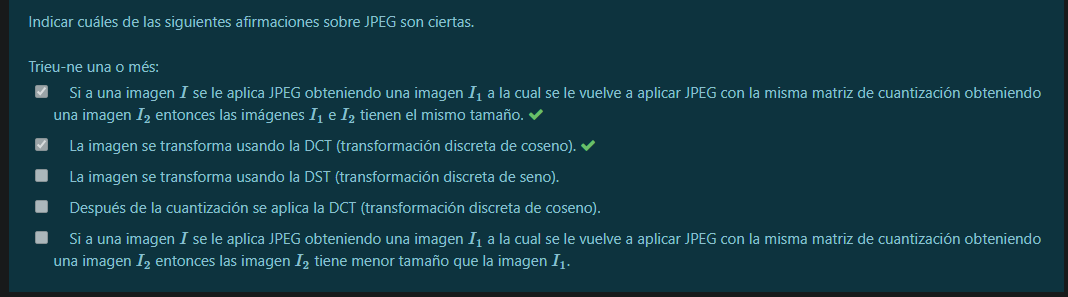

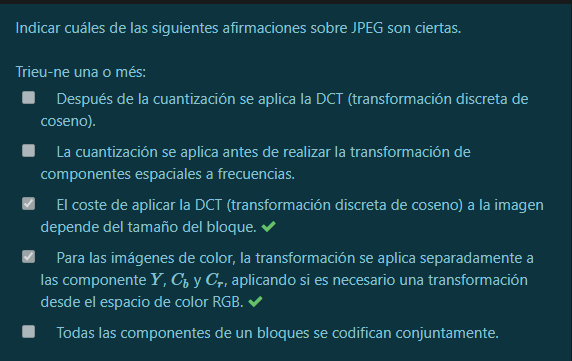